Problem Statement:
Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. In banking, fraud may include forging checks or using stolen credit cards. Other forms of fraud may involve exaggerating losses or causing an accident with the sole intent for the pay-out. With an unlimited and rising number of ways someone can commit fraud, detection can be difficult to accomplish. Fraud detection is a critical issue for retailers determined to prevent losses and preserve customer trust.

Digitalization is one of the major advancements we have in this time. The global market is at the fingertip of each and every individual through Online purchase. Both for the consumers and sellers, online market tends to give more in terms of profit as well as exposure to a larger community. With the increase in digitalization, there is also increase in the fraudulent activities happening in various domains, mainly in the retail domain. These are detrimental to the ecosystem of online transactions. Machine learning provides an intelligent option in dealing with this challenge.

Data Source:
https://github.com/Fraud-Detection-Handbook/simulated-data-raw/tree/main/data

In [13]:
%pip install nbformat --upgrade

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for fastjsonschema from https://files.pythonhosted.org/packages/7f/1a/8aad366cf1779351741e5c791ae76dc8b293f72e9448c689cc2e730f06cb/fastjsonschema-2.18.1-py3-none-any.whl.metadata
  Using cached fastjsonschema-2.18.1-py3-none-any.whl.metadata (2.0 kB)
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/0f/bf/a84bc75f069f4f156e1c0d9892fb7325945106c6ecaad9f29d24360872af/jsonschema-4.19.1-py3-none-any.whl.metadata
  Using cached jsonschema-4.19.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/pack

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/raw.csv')

In [4]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


Dataset Information:

ID: Represents row number of the transaction in the data.

TRANSACTION_ID: Represents a unique identifier for each transaction.

TX_DATETIME: Represents the date and time of the transaction.

CUSTOMER_ID: Represents the unique identifier of the customer who made the transaction.

TERMINAL_ID: Represents the unique identifier of the terminal where the transaction was made.

TX_AMOUNT: Represents the amount of the transaction.

TX_TIME_SECONDS: Represents the duration of the transaction in seconds.

TX_TIME_DAYS: Represents the duration of the transaction in days.

TX_FRAUD: indicates whether the transaction is fraudulent or not, with 0 representing a legitimate transaction and 1 representing a fraudulent transaction.

TX_FRAUD_SCENARIO: represents the type of fraudulent scenario that was identified, if any. A value of 0 indicates no fraud, and other values indicate different types of fraud scenarios.


Shape pf the Dataset:

In [5]:
df.shape

(1754155, 9)

Check Missing values:

In [6]:
df.isna().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

Check Duplicates:

In [7]:
df.duplicated().sum()

0

Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


Checking the number of unique values of each column

In [9]:
df.nunique()

TRANSACTION_ID       1754155
TX_DATETIME          1635076
CUSTOMER_ID             4990
TERMINAL_ID            10000
TX_AMOUNT              24114
TX_TIME_SECONDS      1635076
TX_TIME_DAYS             183
TX_FRAUD                   2
TX_FRAUD_SCENARIO          4
dtype: int64

Check statistics of data set

In [10]:
df.describe().round(2)

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00
mean,877077.00,2504.01,4996.73,53.63,7903233.71,90.97,0.01,0.02
std,506381.08,1445.99,2886.10,42.33,4565172.38,52.84,0.09,0.21
min,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00
25%,438538.50,1252.00,2502.00,21.01,3940846.50,45.00,0.00,0.00
50%,877077.00,2506.00,4994.00,44.64,7902670.00,91.00,0.00,0.00
75%,1315615.50,3765.00,7495.00,76.95,11865661.50,137.00,0.00,0.00
max,1754154.00,4999.00,9999.00,2628.00,15811197.00,182.00,1.00,3.00


In [11]:
object_cols = ["TX_DATETIME"]

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    

column name : TX_DATETIME
Number of unique columns of  TX_DATETIME :1635076
Values of unique columns of  TX_DATETIME is below: 
TX_DATETIME
2018-07-02 12:10:19    6
2018-07-30 14:08:48    6
2018-08-10 09:11:39    5
2018-07-15 08:14:22    5
2018-07-25 14:07:42    5
                      ..
2018-06-03 06:37:04    1
2018-06-03 06:36:57    1
2018-06-03 06:36:55    1
2018-06-03 06:36:20    1
2018-09-30 23:59:57    1
Name: count, Length: 1635076, dtype: int64


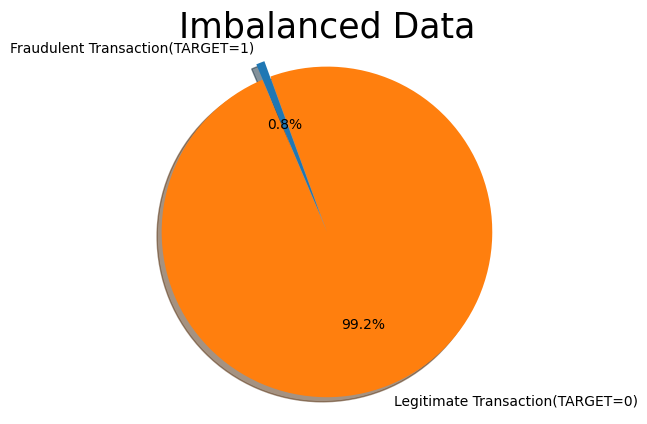

In [12]:
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Imbalanced Data',fontsize=25)
plt.show()

Given that only 0.8% of the data represents fraudulent transactions, the dataset is highly imbalanced. It will be necessary to balance it in order to ensure accurate modeling results.

In [13]:
df = pd.read_csv("data/raw.csv")

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [14]:
import plotly.express as px
import pandas as pd

# Load your data
df = pd.read_csv('data/raw.csv')
df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

# Group the data
grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

# Define custom colors for each category
colors = {"0": "white", "1": "black"}  # Define the colors for each category in the "TX_FRAUD" column

# Create the bar graph with custom colors
fig = px.bar(
    grouped,
    x="month",
    y="count",
    color="TX_FRAUD",
    barmode="group",
    labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"},
)

# Map custom colors to the "TX_FRAUD" categories
fig.update_traces(marker=dict(color=[colors[str(x)] for x in grouped["TX_FRAUD"]]))

fig.show()


In [15]:
df = pd.read_csv("data/raw.csv")
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

From the bar plot, it is observed that the most frequently occurring fraud scenario is scenario type 2, while the least common scenario is scenario type 1. Next, let's examine the average transaction amount for each type of fraud scenario.

In [16]:
df = pd.read_csv("data/raw.csv")

df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]

grouped = df.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='TX_FRAUD_SCENARIO', y='mean_amount', labels={'TX_FRAUD_SCENARIO':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

As seen from the bar plot, scenario type 3 has the highest average transaction amount of 260, it is the second most common scenario type. Meanwhile, scenario type 2, which is the most common scenario type, has the lowest average transaction amount of 53. The least common scenario type, type 1, has an average transaction amount of 235.

In [17]:
df = pd.read_csv("data/raw.csv")

df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = df['TX_DATETIME'].dt.date

grouped = df[df['TX_FRAUD'] == 1].groupby('date').size().reset_index(name='count')

fig = px.line(grouped, x='date', y='count', labels={'date':'Date','count':'Number of Fraud Transactions'})

fig.show()

The line plot shows that on April 1st, 2018, there were 3 fraudulent transactions, which is the lowest number of fraudulent transactions in a single day. On the other hand, on August 2nd, 2018, the highest number of fraudulent transactions, 110, were recorded.

In [18]:
df = pd.read_csv('data/raw.csv')

df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('cleaned_transactions.csv', index=False)

The data has been balanced through the process of upsampling. To visualize the balance of the data, Let's create a pie chart.

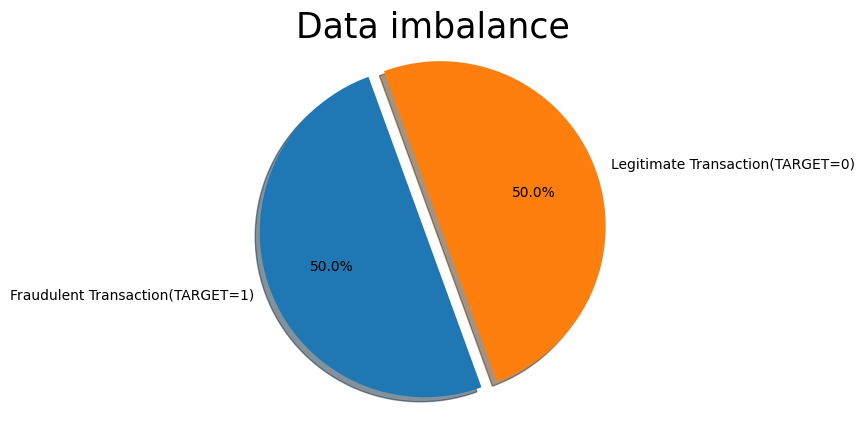

In [19]:
df = df_upsampled
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [21]:
df = pd.read_csv('/Users/mac/Desktop/mlbanking/notebook/cleaned_transactions.csv')

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0      35.55          2026449            23
1     131.79          7286693            84
2       8.13         13170916           152
3     478.85         13237548           153
4      31.65          6980452            80
